In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("C:\\Users\\4HIN\\Downloads\\DS Internship - Modeling - Data.xlsx - Data.csv")
data

,Store ID,Pop class,Sales,Centre Type,Climate,Total Store Sq Ft,Sales Floor Sq Ft,Girls Sq Ft,Guys Sq Ft,Accessories Sq Ft,...,Poverty: In poverty,Male 14 to 35 CrYr,Female 14 to 35 CrYr,Total Pop 14 to 35 CrYr,Under 25 Low Income,Under 25 Med Income,Under 25 High Income,25 to 44 Low Income,25 to 44 Med Income,25 to 44 High Income
0,1,Suburban,1345251.88,Outlet,Frigid,4735.0,4015.6,2032.3,947.7,747.5,...,1680,4444,4095,8539,74,285,7,683,1692,1291
1,2,Urban,1669906.40,Mall,Moderate,8068.0,7128.6,2735.2,1788.1,1251.3,...,21003,58486,52872,111358,1317,1396,358,11104,21417,20357
2,3,Urban,2528042.74,Outlet,Hot,4583.2,3961.7,2082.9,1030.2,551.7,...,107701,286481,275998,562479,14977,11109,2870,63228,120359,99407
3,4,Suburban,1281613.45,Outlet,Moderate,5772.3,4713.0,2140.1,1149.0,1162.2,...,23477,45764,43429,89193,5135,2426,512,10011,15485,9238
4,5,Urban,1278092.87,Outlet,Cold,3503.0,3239.0,1870.6,769.5,483.5,...,65968,157166,152880,310046,11249,6220,2311,32448,57978,74382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,687,Urban,1474165.00,Outlet,Warm,4946.2,4238.9,2229.2,931.2,854.2,...,93473,261696,251063,512759,10833,8608,2927,45719,83877,104996
687,688,Rural,1469333.20,Outlet,Hot,7270.5,6590.7,3014.6,1826.6,1393.2,...,111591,231298,223861,455159,7834,3544,826,56578,51506,34699
688,689,Rural,1131525.30,Outlet,Moderate,5234.4,4424.8,2174.2,1116.0,802.5,...,291868,781368,759678,1541046,29390,20354,8370,135782,226986,319830
689,690,Urban,1054163.07,Mall,Warm,5608.4,4972.6,2621.9,1218.3,850.9,...,3222,6972,6938,13910,329,542,103,2137,2682,2218


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Store ID                       691 non-null    int64  
 1   Pop class                      691 non-null    object 
 2   Sales                          691 non-null    float64
 3   Centre Type                    691 non-null    object 
 4   Climate                        691 non-null    object 
 5   Total Store Sq Ft              691 non-null    float64
 6   Sales Floor Sq Ft              691 non-null    float64
 7   Girls Sq Ft                    685 non-null    float64
 8   Guys Sq Ft                     686 non-null    float64
 9   Accessories Sq Ft              685 non-null    float64
 10  Guys Segmentation              691 non-null    object 
 11  Girls Segmentation             691 non-null    object 
 12  ChangeMade                     691 non-null    obj

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm
from openpyxl import Workbook

In [5]:
categorical_cols = data.select_dtypes(include=['object']).columns.drop(['ChangeDate'])
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop(['Store ID', 'Sales'])

In [ ]:
#Preparing the data

In [6]:
X = data.drop(['Store ID', 'Sales'], axis=1)
y = data['Sales']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])

In [ ]:
#Split the dataset into training and testing sets

In [7]:
X_prepared = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

X_train_ols = sm.add_constant(X_train) 
ols_model = sm.OLS(y_train, X_train_ols).fit()


X_test_ols = sm.add_constant(X_test)  
y_pred = ols_model.predict(X_test_ols)


In [ ]:
# Model performance metrics

In [8]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


performance_metrics = pd.DataFrame({
    "Metric": ["MAPE", "MSE", "RMSE", "R^2"],
    "Value": [mape, mse, rmse, r2]
})

In [ ]:
# Collecting model coefficients for key drivers of sales

In [9]:

feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
all_features = np.append(['Intercept'], numerical_cols.append(pd.Index(feature_names)))
coefficients = pd.DataFrame({
    "Feature": all_features,
    "Coefficient": ols_model.params,
    "P-Value": ols_model.pvalues
}).sort_values(by="P-Value")

In [ ]:
#summary to excel

In [10]:
with pd.ExcelWriter('model_summary.xlsx', engine='openpyxl') as writer:
    performance_metrics.to_excel(writer, sheet_name="Performance Metrics", index=False)
    coefficients.to_excel(writer, sheet_name="Model Summary", index=False)

print("Model summary and performance metrics have been saved to 'model_summary.xlsx'.")

Model summary and performance metrics have been saved to 'model_summary.xlsx'.


In [11]:
import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "model_summary.xlsx")
with pd.ExcelWriter(desktop_path, engine='openpyxl') as writer:
    performance_metrics.to_excel(writer, sheet_name="Performance Metrics", index=False)
    coefficients.to_excel(writer, sheet_name="Model Summary", index=False)
print(f"File saved to your desktop at {desktop_path}")


File saved to your desktop at C:\Users\4HIN\Desktop\model_summary.xlsx


In [ ]:
#RESULTS

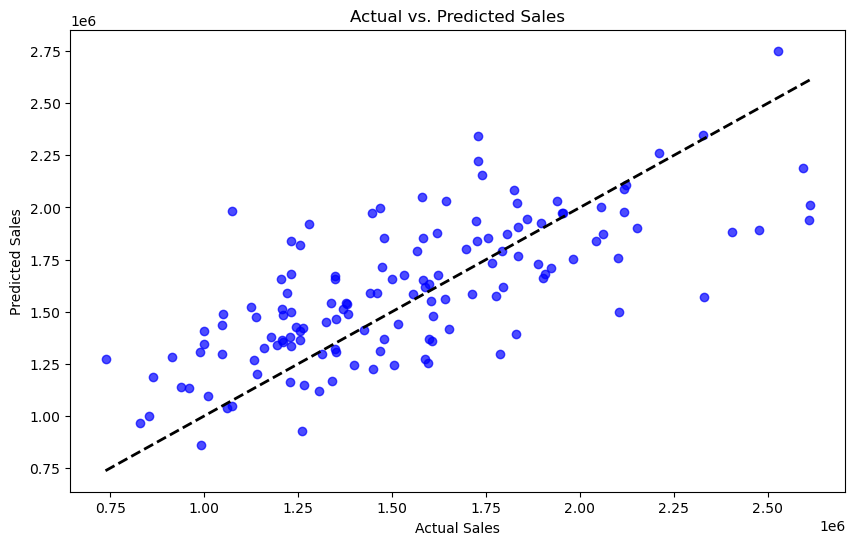

C:\Users\4HIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


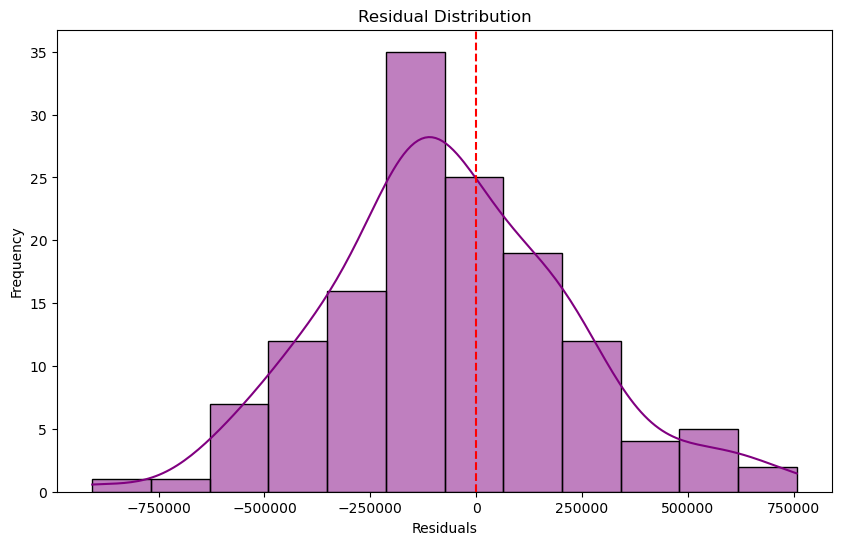

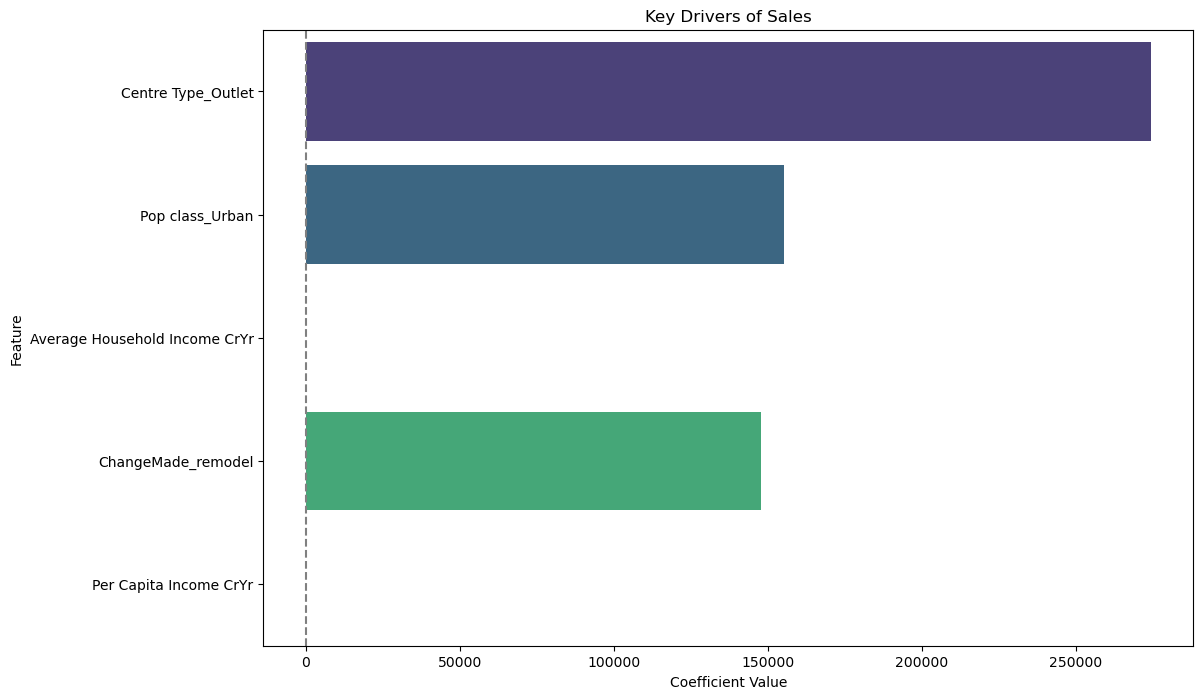

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Actual vs. Predicted Sales Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# 3. Key Drivers Plot (Bar Chart of Coefficients)
significant_features = coefficients[coefficients["P-Value"] < 0.05]
plt.figure(figsize=(12, 8))
sns.barplot(x=significant_features["Coefficient"], y=significant_features["Feature"], palette="viridis")
plt.xlabel('Coefficient Value')
plt.title('Key Drivers of Sales')
plt.axvline(0, color='gray', linestyle='--')
plt.show()
